In [1]:
import mysql.connector
import pandas as pd
import pandas as rsd
import numpy as np
import sqlalchemy as db
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
class Dataset:

    def __init__(self, data, db):
        self.data = data
        self.db = db
#-----------------------------------------------------------------------------------
    def cargar_a_mysql(self):   #Carga el DataFrame en la tabla `dataset` de la base de datos MySQL.
            
        cursor = self.db.cursor()

        # Modifica el nombre de la columna "Open" a algo no reservado o enciérralo entre comillas/backticks
        cursor.execute("CREATE TABLE IF NOT EXISTS DataSet1 (Date DATE, `Open` FLOAT, High FLOAT, Low FLOAT, Close FLOAT, Adj FLOAT, Close2 FLOAT, Volume FLOAT)")
        #self.db.commit()
        
        # Truncar la tabla
        cursor.execute("TRUNCATE TABLE DataSet1") 
        self.db.commit()

        from sqlalchemy import create_engine
        engine = create_engine('mysql+mysqlconnector://root:@localhost/db_prueba')


        # Subir los datos desde el DataFrame a la tabla MySQL
        self.data.to_sql('dataset1', con=engine, if_exists='replace', index=False)
        self.db.close()
#-----------------------------------------------------------------------------------
    def obtener_de_mysql(self):    #Obtiene la tabla `dataset` de la base de datos MySQL como un DataFrame.
        
        from sqlalchemy import create_engine
        engine = create_engine('mysql+mysqlconnector://root:@localhost/db_prueba')

        #Navegar en la tabla que queremos
        query = 'SELECT * from dataset1'
        
        #Obtener la tabla de MySQL a un Data Frame
        data_frame = pd.read_sql(query, con=engine)
       
        self.db.close()
        return data_frame
#-----------------------------------------------------------------------------------    
    def comparar_columnas(self, data_frame, columna1, columna2):
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))

        sns.scatterplot(data=data_frame, x=columna1, y=columna2)
        plt.title(f'Comparación entre {columna1} y {columna2}')
        plt.xlabel(columna1)
        plt.ylabel(columna2)
        plt.show()
#-----------------------------------------------------------------------------------
    def obtener_y_comparar(self, columna1, columna2):
        data_frame = self.obtener_de_mysql()
        self.comparar_columnas(data_frame, columna1, columna2)
  

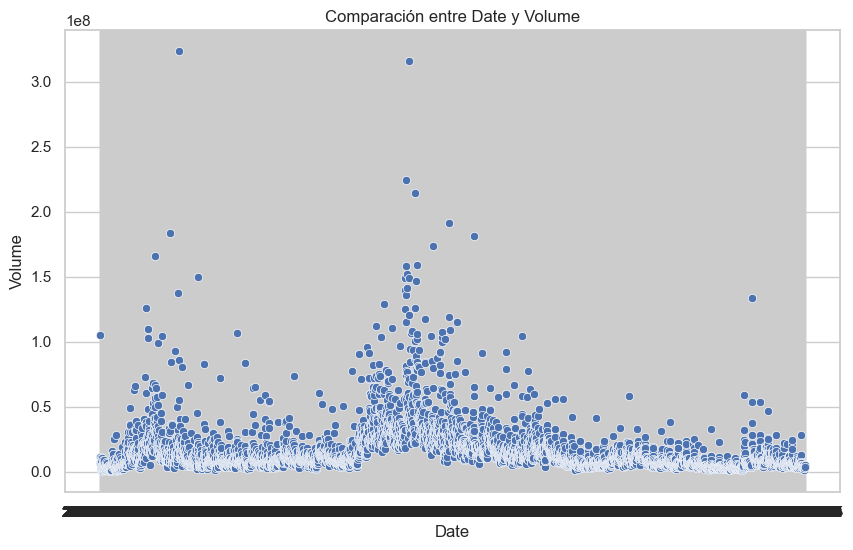

In [5]:
# MAIN

data = pd.read_csv('NFLX.csv', sep=',')
db = mysql.connector.connect(
            host='localhost',
            user='root',
            password='',
            database='db_prueba'  
        )
dataset = Dataset(data, db)
dataset.cargar_a_mysql()
dataset.obtener_y_comparar('Date', 'Volume')

In [ ]:
datos_desde_mysql = dataset.obtener_de_mysql()
display(datos_desde_mysql)